### **1. 기온 CSV 데이터 시각화**

In [15]:
#코드 7-19
import matplotlib.pyplot as plt
import pandas as pd

plt.rc('font', family='Malgun Gothic') # 한글을 쓰기위해 폰트 변경
plt.rcParams['axes.unicode_minus'] = False #축의 음수 기호 표시

#데이터를 데이터프레임 형태로 읽어오기
df = pd.read_csv('기온3.csv', encoding='cp949')
df.head(3)

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi)
0,108,서울,2024-03-24,16.2,10.5,237,23.4,1626
1,108,서울,2024-03-25,10.6,6.7,2332,14.5,1
2,108,서울,2024-03-26,7.4,3.2,800,12.4,1540


In [16]:
#코드 7-20
df.info() # 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             397 non-null    int64  
 1   지점명            397 non-null    object 
 2   일시             397 non-null    object 
 3   평균기온(°C)       397 non-null    float64
 4   최저기온(°C)       397 non-null    float64
 5   최저기온 시각(hhmi)  397 non-null    int64  
 6   최고기온(°C)       397 non-null    float64
 7   최고기온 시각(hhmi)  397 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 24.9+ KB


In [3]:
#코드 7-21
df2 = df.fillna(method='ffill') # 결측치 앞 행 데이터로 채우기
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             365 non-null    int64  
 1   지점명            365 non-null    object 
 2   일시             365 non-null    object 
 3   평균기온(°C)       365 non-null    float64
 4   최저기온(°C)       365 non-null    float64
 5   최저기온 시각(hhmi)  365 non-null    float64
 6   최고기온(°C)       365 non-null    float64
 7   최고기온 시각(hhmi)  365 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 22.9+ KB


C:\Users\asia\AppData\Local\Temp\ipykernel_18348\414235707.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2 = df.fillna(method='ffill') # 결측치 앞 행 데이터로 채우기


In [17]:
#코드 7-22 특수기호 뺴기
df.rename(columns={'최저기온(°C)':'min_temp'}, inplace=True)
df.rename(columns={'평균기온(°C)':'avg_temp'}, inplace=True)
df.rename(columns={'최고기온(°C)':'max_temp'}, inplace=True)
df.head(3)

,지점,지점명,일시,avg_temp,min_temp,최저기온 시각(hhmi),max_temp,최고기온 시각(hhmi)
0,108,서울,2024-03-24,16.2,10.5,237,23.4,1626
1,108,서울,2024-03-25,10.6,6.7,2332,14.5,1
2,108,서울,2024-03-26,7.4,3.2,800,12.4,1540


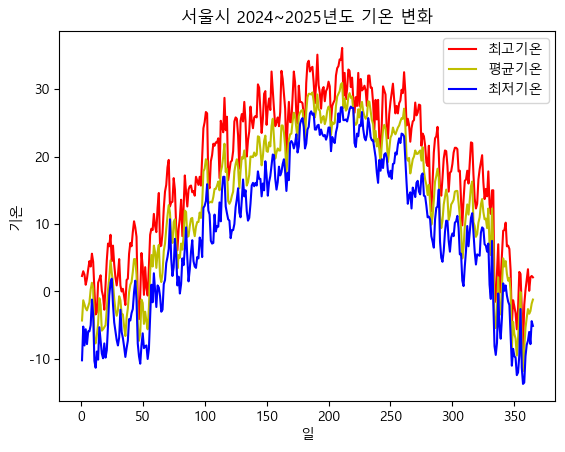

In [18]:
#코드 7-23
plt.title('서울시 2024~2025년도 기온 변화')
plt.plot(range(1,len(df2)+1), df2['max_temp'], label='최고기온', c='r')
plt.plot(range(1,len(df2)+1), df2['avg_temp'], label='평균기온', c='y')
plt.plot(range(1,len(df2)+1), df2['min_temp'], label='최저기온', c='b')
plt.xlabel('일')
plt.ylabel('기온')
plt.legend()
plt.show()

In [19]:
df.dtypes

지점                 int64
지점명               object
일시                object
avg_temp         float64
min_temp         float64
최저기온 시각(hhmi)      int64
max_temp         float64
최고기온 시각(hhmi)      int64
dtype: object

In [20]:
#코드 7-24 일시 object -> datetime으로 변환
# 일시 yyy-mm-dd
df['일시'] = pd.to_datetime(df['일시'], format='%Y-%m-%d')
df['일시']

0     2024-03-24
1     2024-03-25
2     2024-03-26
3     2024-03-27
4     2024-03-28
         ...    
392   2025-04-20
393   2025-04-21
394   2025-04-22
395   2025-04-23
396   2025-04-24
Name: 일시, Length: 397, dtype: datetime64[ns]

In [22]:
df.dtypes

지점                        int64
지점명                      object
일시               datetime64[ns]
avg_temp                float64
min_temp                float64
최저기온 시각(hhmi)             int64
max_temp                float64
최고기온 시각(hhmi)             int64
dtype: object

In [23]:
#코드 7-25 인덱스 날짜로 바꾸기
df2 = df.set_index('일시')
df2.head(3)

,지점,지점명,avg_temp,min_temp,최저기온 시각(hhmi),max_temp,최고기온 시각(hhmi)
일시,,,,,,,
2024-03-24,108,서울,16.2,10.5,237,23.4,1626
2024-03-25,108,서울,10.6,6.7,2332,14.5,1
2024-03-26,108,서울,7.4,3.2,800,12.4,1540


In [24]:
#코드 7-26
df_May = df2[pd.DatetimeIndex(df2.index).month == 5]

In [26]:
df_May

,지점,지점명,avg_temp,min_temp,최저기온 시각(hhmi),max_temp,최고기온 시각(hhmi)
일시,,,,,,,
2024-05-01,108,서울,18.5,13.9,535,24.0,1552
2024-05-02,108,서울,18.1,12.4,546,23.7,1457
2024-05-03,108,서울,19.7,12.2,559,27.9,1618
2024-05-04,108,서울,21.4,14.6,602,28.5,1402
2024-05-05,108,서울,17.8,15.7,2351,20.6,1
2024-05-06,108,서울,13.9,13.4,1811,15.7,1
2024-05-07,108,서울,13.3,12.2,2357,15.0,1552
2024-05-08,108,서울,14.7,9.0,554,21.4,1609
2024-05-09,108,서울,16.1,10.9,517,21.8,1557


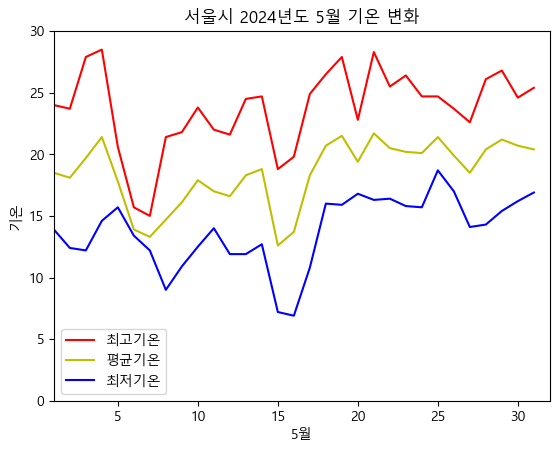

<Figure size 10000x20000 with 0 Axes>

In [28]:
#코드 7-27
plt.title('서울시 2024년도 5월 기온 변화')
plt.plot(range(1,32), df_May['max_temp'], label='최고기온', c='r')
plt.plot(range(1,32), df_May['avg_temp'], label='평균기온', c='y')
plt.plot(range(1,32), df_May['min_temp'], label='최저기온', c='b')

plt.xlabel('5월')
plt.ylabel('기온')
plt.xlim(1,32)
plt.ylim(0, 30)
plt.legend()
plt.rcParams['figure.figsize'] = (100, 200)

plt.show()
plt.savefig('서울.png')